In [29]:
import sys
from tqdm import tqdm   
import numpy as np
from iminuit import Minuit    
import json

In [2]:
sys.argv = [
    'main.py',
    '--data_env', 'envs/DATA/DESI_QSO_Y1.env',
    '--sampler_env', 'envs/sampler/lin_singlepol.env',
    '--mock', '5',
    '--machine', 'MAC',
    '--reconstruction', 'False',
    '--omega_min', '2960.0',
    '--omega_max', '2970.0',
]

from main import *  # Replace with the name of your script file (without .py)

2025-03-20 15:40:48,813 - main - INFO - Processes: 32
2025-03-20 15:40:48,814 - main - INFO - DATA NGC file: /Users/s2223060/Desktop/LSS_DATA/AbacusSummit/QSO/z_0.8_2.1/pre_recon/pk/desi_survey_catalogs_Y1_mocks_SecondGenMocks_AbacusSummit_desipipe_v4_2_ffa_2pt_mock5_pk_pkpoles_QSO_NGC_z0.8-2.1_default_FKP_lin_nran18_cellsize6_boxsize10000_d0.001.txt
2025-03-20 15:40:48,815 - main - INFO - DATA SGC file: /Users/s2223060/Desktop/LSS_DATA/AbacusSummit/QSO/z_0.8_2.1/pre_recon/pk/desi_survey_catalogs_Y1_mocks_SecondGenMocks_AbacusSummit_desipipe_v4_2_ffa_2pt_mock5_pk_pkpoles_QSO_SGC_z0.8-2.1_default_FKP_lin_nran18_cellsize6_boxsize10000_d0.001.txt
2025-03-20 15:40:48,824 - main - INFO - COV NGC file: /Users/s2223060/Desktop/LSS_DATA/EZMocks/QSO/z_0.8_2.1/pre_recon/COV_desi_survey_catalogs_Y1_mocks_SecondGenMocks_EZmock_desipipe_v1_ffa_2pt_pk_pkpoles_QSO_NGC_z0.8-2.1_default_FKP_lin_nran4_cellsize6_boxsize10000_d0.001.txt
2025-03-20 15:40:48,831 - main - INFO - COV SGC file: /Users/s2223060

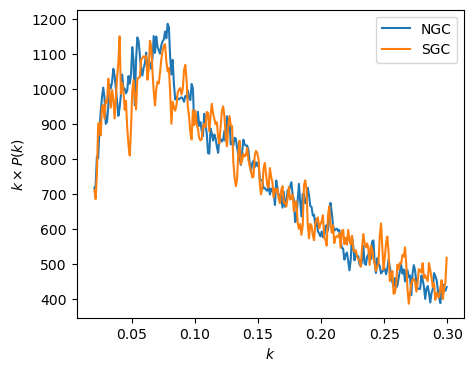

In [3]:
plt.figure(figsize=(5, 4))
plt.plot(k, k*DATA_NGC, label = 'NGC')
plt.plot(k, k*DATA_SGC, label = 'SGC')
plt.xlabel(r'$k$')
plt.ylabel(r'$k \times P(k)$')
plt.legend()

In [4]:
def chi2(*theta):
    return PrimordialFeature_likelihood.chi2(list(theta))

In [6]:
PF_guess = np.array([2,2,0,0,0,0,0,1,3,3,0,2965,0.25])
BAO_guess = np.array([2,2,0,0,0,0,0,1,3,3,0,0,0])

In [7]:
pf_limits = [(a,b) for a,b in zip(mcmc.prior_bounds[0],mcmc.prior_bounds[1])]

In [8]:
BAO_limits = pf_limits.copy()
BAO_limits[-3:] = [(0,0)]*3

In [9]:
m_PF = Minuit(chi2, name=mcmc.labels, **{x: val for x, val in zip(mcmc.labels, PF_guess)})
m_PF.limits = pf_limits

m_BAO = Minuit(chi2, name=mcmc.labels, **{x: val for x, val in zip(mcmc.labels, BAO_guess)})
m_BAO.limits = BAO_limits

In [24]:
CHAIN_PATH

'/Users/s2223060/Desktop/primordial_features/chains/DESI_Y1_QSO/MOCK_5/lin_singlepol/2960.0_2970.0'

In [10]:
m_PF

,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed
0,BNGC,2.00,0.02,,,0.1,8,
1,BSGC,2.00,0.02,,,0.1,8,
2,a0,0.0,0.1,,,-1,1,
3,a1,0.0,0.1,,,-10,10,
4,a2,0.0,0.1,,,-50,50,
5,a3,0.0,0.1,,,-50,50,
6,a4,0.0,0.1,,,-200,200,
7,alpha,1.00,0.01,,,0.8,1.2,
8,sigma_nl,3.00,0.03,,,0,15,
9,sigma_s,3.00,0.03,,,0,15,


In [11]:
m_BAO

,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed
0,BNGC,2.00,0.02,,,0.1,8,
1,BSGC,2.00,0.02,,,0.1,8,
2,a0,0.0,0.1,,,-1,1,
3,a1,0.0,0.1,,,-10,10,
4,a2,0.0,0.1,,,-50,50,
5,a3,0.0,0.1,,,-50,50,
6,a4,0.0,0.1,,,-200,200,
7,alpha,1.00,0.01,,,0.8,1.2,
8,sigma_nl,3.00,0.03,,,0,15,
9,sigma_s,3.00,0.03,,,0,15,


In [12]:
# Run MIGRAD minimization
m_BAO.migrad(ncall=20000)

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 503.6                      │             Nfcn = 1006              │
│ EDM = 8.55e-05 (Goal: 0.0002)    │           time = 12.9 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name     │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ BNGC     │   2.67    │   0.35    │            │            │   0.1   │    8    │       │
│ 1 │ BSGC     │   2.67    │   0.35    │            │            │   0.1   │    8    │       │
│ 2 │ a0       │   -0.09   │   0.09    │            │            │   -1    │    1    │       │
│ 3 │ a1       │    0.6    │    0.9    │            │            │   -10   │   10    │       │
│ 4 │ a2       │    -3     │     6     │            │            │   -50   │   50    │       │
│ 5 │ a3       │    1.3    │    1.3    │            │            │   -50   │   50    │       │
│ 6 │ a4       │    -5     │     5     │            │            │  -200   │   200   │       │
│ 7 │ alpha    │   0.981   │   0.021   │            │            │   0.8   │   1.2   │       │
│ 8 │ sigma_nl │    8.8    │    2.6    │            │            │    0    │   15    │       │
│ 9 │ sigma_s  │    2.5    │    1.4    │            │            │    0    │   15    │       │
│ 10│ A        │    0.0    │    0.1    │            │            │         │         │  yes  │
│ 11│ omega    │    0.0    │    0.1    │            │            │         │         │  yes  │
│ 12│ phi      │    0.0    │    0.1    │            │            │         │         │  yes  │
└───┴──────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│          │     BNGC     BSGC       a0       a1       a2       a3       a4    alpha sigma_nl  sigma_s        A    omega      phi │
├──────────┼──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│     BNGC │    0.124     0.12    0.003     0.23    -2.09     0.36    -0.84   0.3e-3     0.06    -0.31     0.00     0.00     0.00 │
│     BSGC │     0.12    0.126    0.003     0.23    -2.10     0.36    -0.83   0.3e-3     0.06    -0.32     0.00     0.00     0.00 │
│       a0 │    0.003    0.003  0.00826   -0.042    0.005    0.001    0.029       -0   -0.000    0.008    0.000    0.000    0.000 │
│       a1 │     0.23     0.23   -0.042    0.742     -4.3      0.8     -2.2   0.4e-3      0.1     -0.6      0.0      0.0      0.0 │
│       a2 │    -2.09    -2.10    0.005     -4.3       36     -6.4       17  -4.3e-3       -1      4.9        0        0        0 │
│       a3 │     0.36     0.36    0.001      0.8     -6.4     1.58     -5.7   0.8e-3      0.2     -0.1      0.0      0.0      0.0 │
│       a4 │    -0.84    -0.83    0.029     -2.2       17     -5.7     25.5  -1.9e-3       -0     -2.4        0        0        0 │
│    alpha │   0.3e-3   0.3e-3       -0   0.4e-3  -4.3e-3   0.8e-3  -1.9e-3 0.000449  10.4e-3  -0.4e-3        0        0        0 │
│ sigma_nl │     0.06

In [13]:
# Run MIGRAD minimization
m_PF.migrad(ncall=20000)

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 491.7                      │              Nfcn = 835              │
│ EDM = 2.76e-05 (Goal: 0.0002)    │           time = 11.2 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│     SOME parameters at limit     │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name     │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ BNGC     │   2.48    │   0.05    │            │            │   0.1   │    8    │       │
│ 1 │ BSGC     │   2.48    │   0.05    │            │            │   0.1   │    8    │       │
│ 2 │ a0       │   -0.09   │   0.09    │            │            │   -1    │    1    │       │
│ 3 │ a1       │    0.2    │    0.5    │            │            │   -10   │   10    │       │
│ 4 │ a2       │   0.59    │   0.35    │            │            │   -50   │   50    │       │
│ 5 │ a3       │    0.7    │    0.6    │            │            │   -50   │   50    │       │
│ 6 │ a4       │    -3     │     4     │            │            │  -200   │   200   │       │
│ 7 │ alpha    │   0.981   │   0.023   │            │            │   0.8   │   1.2   │       │
│ 8 │ sigma_nl │    9.4    │    2.7    │            │            │    0    │   15    │       │
│ 9 │ sigma_s  │    2.8    │    1.1    │            │            │    0    │   15    │       │
│ 10│ A        │   0.091   │   0.031   │            │            │   -5    │    5    │       │
│ 11│ omega    │  2.964e3  │  0.007e3  │            │            │  2960   │  2970   │       │
│ 12│ phi      │   0.00    │   0.07    │            │            │    0    │   0.5   │       │
└───┴──────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│          │       BNGC       BSGC         a0         a1         a2         a3         a4      alpha   sigma_nl    sigma_s          A      omega        phi │
├──────────┼────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│     BNGC │    0.00248     0.0023     0.0036    -0.0217    -0.0023     0.0042     0.0049          0     0.0011     0.0117         -0     0.0094   1.750e-9 │
│     BSGC │     0.0023     0.0025     0.0035    -0.0213    -0.0012     0.0022     0.0187     0.1e-3     0.0044     0.0082         -0     0.0062   1.864e-9 │
│       a0 │     0.0036     0.0035    0.00812     -0.041     -0.002      0.006     -0.011         -0     -0.000      0.016         -0      0.015   1.343e-9 │
│       a1 │    -0.0217    -0.0213     -0.041      0.232      -0.00      -0.01      -0.15    -0.2e-3      -0.02      -0.05          0      -0.08 -10.610e-9 │
│       a2 │    -0.0023    -0.0012     -0.002      -0.00      0.125      -0.21       1.49         -0      -0.01      -0.38    -0.1e-3       0.15  -2.697e-9 │
│       a3 │     0.0042     0.0022      0.006      -0.01      -0.21      0.382       -2.7     0.1e-3       -0.0        0.7     0.2e-3       -0.3  -7.161e-9 │
│       a4 │     0.0049     0.0187     -0.011      

In [23]:
CHAIN_PATH

'/Users/s2223060/Desktop/primordial_features/chains/DESI_Y1_QSO/MOCK_5/lin_singlepol/2960.0_2970.0'

In [14]:
theta_BAO_ML = list(m_BAO.values.to_dict().values())
theta_PF_ML = list(m_PF.values.to_dict().values())

In [15]:
theory_BAO_ML = theory(theta_BAO_ML)[0:len(k)]
theory_PF_ML  = theory(theta_PF_ML)[0:len(k)]

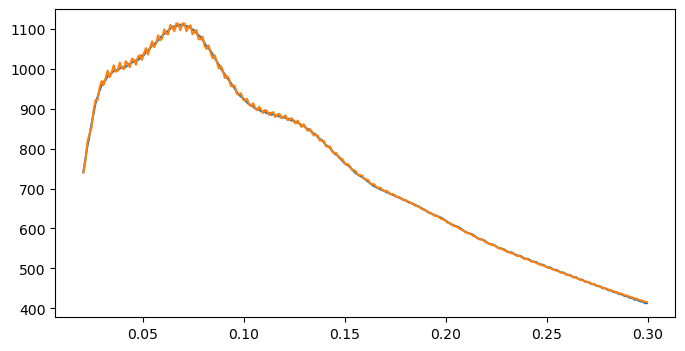

In [16]:
fig, ax = plt.subplots(1,1,figsize = (8,4))
plt.plot(k,k*theory_BAO_ML)
plt.plot(k,k*theory_PF_ML)

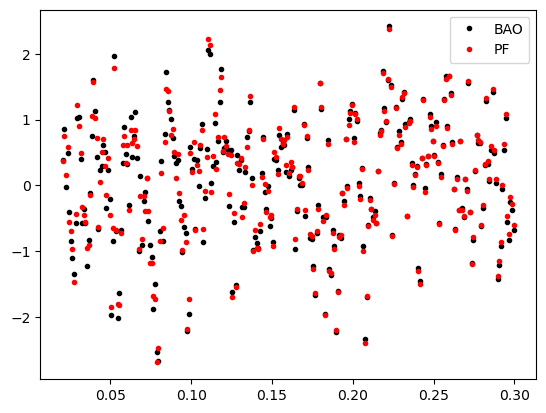

In [17]:
plt.figure()
plt.plot(k,(theory_BAO_ML-DATA_NGC)/np.diag(COV_NGC)**0.5, marker = '.',ls = '', color = 'black', label = 'BAO')
plt.plot(k,(theory_PF_ML-DATA_NGC)/np.diag(COV_NGC)**0.5, marker = '.',ls = '',color = 'red', label = 'PF')
plt.legend()

In [19]:
delta_x_BAO = (theory_BAO_ML-DATA_NGC)/np.diag(COV_NGC)**0.5
delta_x_PF  = (theory_PF_ML-DATA_NGC)/np.diag(COV_NGC)**0.5

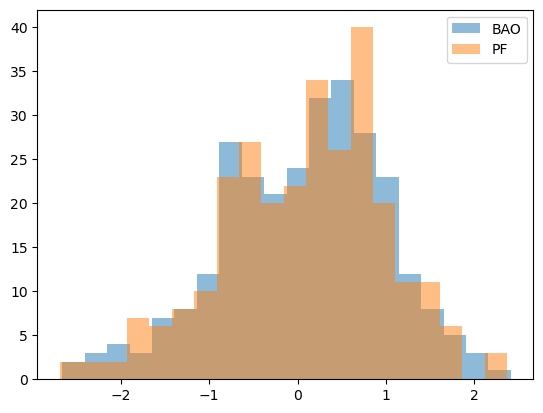

In [21]:
plt.hist(delta_x_BAO, bins = 20, alpha = 0.5, label = 'BAO')
plt.hist(delta_x_PF, bins = 20, alpha = 0.5, label = 'PF')
plt.legend()

# Plotting

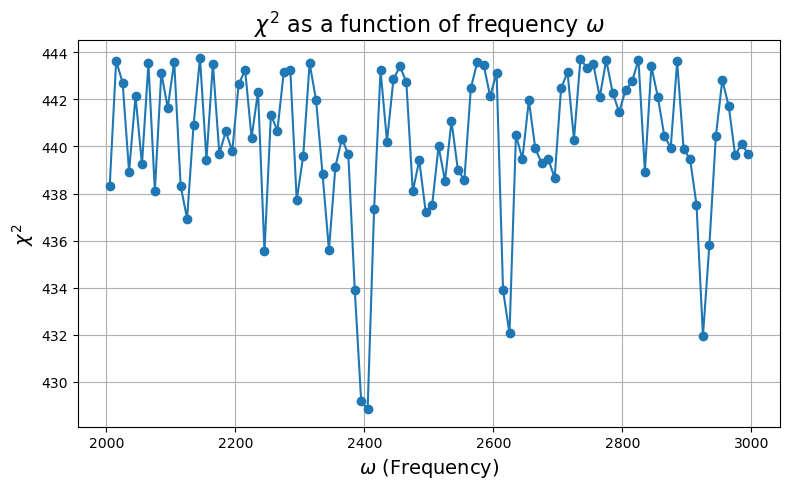

In [30]:
f = 'chains/DESI_Y1_QSO/MOCK_1/lin_singlepol/2000.0_3000.0/minuit_fit_results.json'

with open(f, 'r') as f:
    results = json.load(f)

# Extract data
omega = [entry['omega_bin_center'] for entry in results]
chi2 = [entry['chi2_PF'] for entry in results]

# Plot chi2 vs frequency
plt.figure(figsize=(8, 5))
plt.plot(omega, chi2, marker='o')
plt.xlabel(r'$\omega$ (Frequency)', fontsize=14)
plt.ylabel(r'$\chi^2$', fontsize=14)
plt.title(r'$\chi^2$ as a function of frequency $\omega$', fontsize=16)
plt.grid(True)
plt.tight_layout()
plt.show()